<a href="https://colab.research.google.com/github/JorgeBosquez/Tarea-03-Metodos-Numericos/blob/main/Eliminacion_Gaussiana_vs_gauss_jordan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONJUNTO DE EJERCICIOS

1. Para el siguiente sistema de ecuaciones lineales, obtenga, de ser posible, una solución con resultados gráficos.
   
   \( x_1 + 2x_2 = 5 \)  
   \( 3x_1 + 4x_2 = 6 \)

Solución del sistema: x1 = -3.9999999999999987, x2 = 4.499999999999999


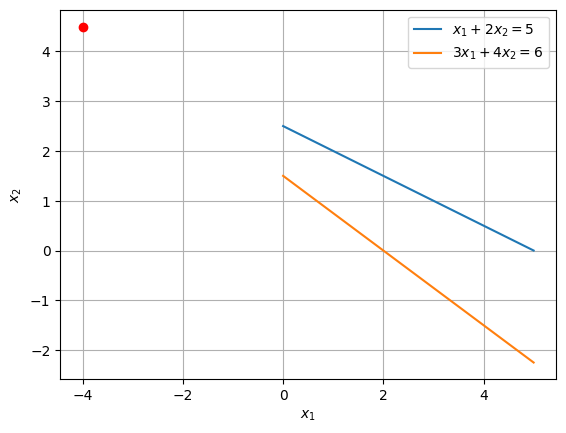

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Coeficientes del sistema
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])

# Resolver el sistema
sol = np.linalg.solve(A, b)
print(f"Solución del sistema: x1 = {sol[0]}, x2 = {sol[1]}")

# Graficar las rectas
x = np.linspace(0, 5, 100)
y1 = (5 - x) / 2
y2 = (6 - 3 * x) / 4

plt.plot(x, y1, label=r'$x_1 + 2x_2 = 5$')
plt.plot(x, y2, label=r'$3x_1 + 4x_2 = 6$')
plt.plot(sol[0], sol[1], 'ro')  # Solución

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid(True)
plt.show()


2. Utilice el método de eliminación gaussiana con escalonamiento hacia atrás y anticipe el resultado de los siguientes pares de sistemas:
   
   **a)**  
   \( x_1 + 2x_2 + x_3 = 3 \)  
   \( 3x_1 + 8x_2 + 4x_3 = 4 \)  
   \( 2x_1 + 6x_2 + 3x_3 = 3 \)

   **b)**  
   \( 2x_1 - 3x_2 + 4x_3 = 7 \)  
   \( 3x_1 + 2x_2 - 5x_3 = -3 \)  
   \( x_1 + 4x_2 + x_3 = 8 \)

In [3]:
import numpy as np

# Función para realizar eliminación gaussiana
def gaussian_elimination(A, b):
    A = A.astype(float)
    b = b.astype(float)
    n = len(b)

    for i in range(n):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if A[max_row, i] == 0:
            raise ValueError("El sistema tiene filas linealmente dependientes y no tiene solución única.")
        A[[i, max_row]] = A[[max_row, i]]
        b[[i, max_row]] = b[[max_row, i]]

        # Eliminación hacia adelante
        for j in range(i + 1, n):
            ratio = A[j][i] / A[i][i]
            A[j, i:] -= ratio * A[i, i:]
            b[j] -= ratio * b[i]

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

    return x

# Ejercicio 2a
A1 = np.array([[1, 2, 1], [3, 8, 4], [2, 6, 3]], dtype=float)
b1 = np.array([3, 4, 3], dtype=float)

try:
    sol1 = gaussian_elimination(A1, b1)
    print(f"Solución del sistema 2a: x1 = {sol1[0]}, x2 = {sol1[1]}, x3 = {sol1[2]}")
except ValueError as e:
    print(f"Error en el sistema 2a: {e}")

# Ejercicio 2b
A2 = np.array([[2, -3, 4], [3, 2, -5], [1, 4, 1]], dtype=float)
b2 = np.array([7, -3, 8], dtype=float)

try:
    sol2 = gaussian_elimination(A2, b2)
    print(f"Solución del sistema 2b: x1 = {sol2[0]}, x2 = {sol2[1]}, x3 = {sol2[2]}")
except ValueError as e:
    print(f"Error en el sistema 2b: {e}")


Error en el sistema 2a: El sistema tiene filas linealmente dependientes y no tiene solución única.
Solución del sistema 2b: x1 = 1.4166666666666667, x2 = 1.1666666666666663, x3 = 1.9166666666666665


3. Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y discuta la naturaleza del resultado:
   
   **a)**  
   \( x_1 + 3x_2 - x_3 = 7 \)  
   \( 2x_1 + 6x_2 - x_3 = 4 \)  
   \( x_1 - x_2 + x_3 = 2 \)

   **b)**  
   \( 4x_1 - 2x_2 + 3x_3 = 8 \)  
   \( 3x_1 + x_2 - 2x_3 = 1 \)  
   \( 2x_1 + 4x_2 + 3x_3 = 9 \)

In [4]:
# Ejercicio 3a
A3a = np.array([[1, 3, -1], [2, 6, -1], [1, -1, 1]], dtype=float)
b3a = np.array([7, 4, 2], dtype=float)
sol3a = gaussian_elimination(A3a, b3a)
print(f"Solución del sistema 3a: x1 = {sol3a[0]}, x2 = {sol3a[1]}, x3 = {sol3a[2]}")

# Ejercicio 3b
A3b = np.array([[4, -2, 3], [3, 1, -2], [2, 4, 3]], dtype=float)
b3b = np.array([8, 1, 9], dtype=float)
sol3b = gaussian_elimination(A3b, b3b)
print(f"Solución del sistema 3b: x1 = {sol3b[0]}, x2 = {sol3b[1]}, x3 = {sol3b[2]}")


Solución del sistema 3a: x1 = 8.25, x2 = -3.75, x3 = -10.0
Solución del sistema 3b: x1 = 1.15, x2 = 0.55, x3 = 1.5


4. Utilice el algoritmo de eliminación gaussiana y la sustitución consecuente para predecir, de ser posible, los valores de los incógnitas del siguiente sistema:
   
   \( 2x_1 + x_2 + 3x_3 = 9 \)  
   \( x_1 + 4x_2 - x_3 = 1 \)  
   \( 3x_1 + x_2 + 4x_3 = 8 \)

   **a)**  
   \( 2x_1 + 4x_2 - x_3 = 1 \)  
   \( 3x_1 + x_2 + 4x_3 = 8 \)  
   \( 6x_1 + 8x_2 - x_3 = 2 \)

In [5]:
# Ejercicio 4
A4 = np.array([[2, 1, 3], [1, 4, -1], [3, 1, 4]], dtype=float)
b4 = np.array([9, 1, 8], dtype=float)
sol4 = gaussian_elimination(A4, b4)
print(f"Solución del sistema 4: x1 = {sol4[0]}, x2 = {sol4[1]}, x3 = {sol4[2]}")

# Ejercicio 4a
A4a = np.array([[2, 4, -1], [3, 1, 4], [6, 8, -1]], dtype=float)
b4a = np.array([1, 8, 2], dtype=float)
sol4a = gaussian_elimination(A4a, b4a)
print(f"Solución del sistema 4a: x1 = {sol4a[0]}, x2 = {sol4a[1]}, x3 = {sol4a[2]}")


Solución del sistema 4: x1 = -7.999999999999997, x2 = 3.999999999999999, x3 = 6.999999999999998
Solución del sistema 4a: x1 = -1.2916666666666667, x2 = 1.5416666666666667, x3 = 2.5833333333333335


5. Diagonalice el sistema lineal:
   
   \( x' = Ax \)  
   \( A = \begin{pmatrix} -2 & -4 \\ 3 & 5 \end{pmatrix} \)


In [6]:
# Ejercicio 5
A5 = np.array([[-2, -4], [3, 5]], dtype=float)
eigenvalues, eigenvectors = np.linalg.eig(A5)
print(f"Valores propios: {eigenvalues}")
print(f"Vectores propios: \n{eigenvectors}")


Valores propios: [1. 2.]
Vectores propios: 
[[-0.8         0.70710678]
 [ 0.6        -0.70710678]]


6. Encuentre el valor propio de A que satisface las siguientes condiciones:  
   
   **a)** La parte real del valor propio es igual al determinante de la matriz de coeficientes.  
   **b)** La parte imaginaria del valor propio es igual al trazo de la matriz de coeficientes.



In [7]:
# Ejercicio 6
det_A5 = np.linalg.det(A5)
trace_A5 = np.trace(A5)

print(f"Determinante de A: {det_A5}")
print(f"Traza de A: {trace_A5}")


Determinante de A: 2.000000000000001
Traza de A: 3.0


# EJERCICIOS APLICADOS
7. A partir de un modelo se han identificado algunos conjuntos de entradas y sus fuentes de referencia, y B representa la matriz de coeficientes de entradas, mientras que X es la matriz de coeficientes de salidas. Utilice el método de eliminación gaussiana para determinar la capacidad del sistema para satisfacer las salidas:

   \( X = \begin{pmatrix} 1000 \\ 500 \\ 250 \\ 400 \end{pmatrix} \)  
   \( B = \begin{pmatrix} 250 \\ 750 \\ 500 \end{pmatrix} \)

   **a)**  
   \[ \begin{pmatrix} 2 & 3 & 1 \\ 1 & 2 & 3 \\ 2 & 1 & 2 \end{pmatrix} \]

In [8]:
# Ejercicio 7
X7 = np.array([1000, 500, 250, 400], dtype=float)
B7 = np.array([250, 750, 500], dtype=float)
A7 = np.array([[2, 3, 1], [1, 2, 3], [2, 1, 2]], dtype=float)

sol7 = np.linalg.solve(A7, B7)
print(f"Solución del sistema 7: {sol7}")


Solución del sistema 7: [  0.  -0. 250.]



# EJERCICIOS TEÓRICOS

8. Explica el proceso de resolución usando el método de Gauss-Jordan.

El método de Gauss-Jordan es una extensión del método de eliminación gaussiana y se utiliza para encontrar la solución de un sistema de ecuaciones lineales. El objetivo del método es transformar la matriz aumentada del sistema en una forma reducida por filas mediante una serie de operaciones elementales de fila.

1. **Formación de la matriz aumentada**: Se forma la matriz aumentada [A|b] del sistema de ecuaciones.

2. **Eliminación hacia adelante**: Se realizan operaciones elementales de fila para convertir la matriz aumentada en una forma triangular superior. Este paso es similar a la eliminación gaussiana.

3. **Eliminación hacia atrás**: Se continúa con las operaciones elementales de fila para convertir la matriz en la forma escalonada reducida por filas. Esto implica hacer ceros no solo por debajo sino también por encima de los pivotes.

4. **Solución**: Una vez que la matriz está en la forma escalonada reducida por filas, las soluciones del sistema se leen directamente.

Este método no solo encuentra las soluciones del sistema si existen, sino que también puede determinar si el sistema tiene infinitas soluciones o ninguna solución.

Un ejemplo del método de Gauss-Jordan es transformar la matriz aumentada de un sistema de ecuaciones \( A \) en la matriz identidad y ajustar el vector de soluciones en consecuencia.
